# Extended Experiment Results Analysis

This notebook analyzes the compression experiment results from `extended_experiment_results.csv`.

## Dataset Overview
The dataset contains results from compression experiments using different transforms (DCT, DFT, HAAR, SP) on various image datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


## Load Data


In [2]:
# Load the CSV file
df = pd.read_csv('extended_experiment_results.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (7920, 14)

Columns: ['transform', 'dataset', 'image_path', 'mse', 'psnr', 'compression_ratio', 'direct_compression_ratio', 'original_entropy', 'transformed_entropy', 'quantized_entropy', 'quantization_scale', 'encode_ms', 'decode_ms', 'error']

First few rows:


,transform,dataset,image_path,mse,psnr,compression_ratio,direct_compression_ratio,original_entropy,transformed_entropy,quantized_entropy,quantization_scale,encode_ms,decode_ms,error
0,DCT,SquaredAerialImages,Datasets/SquaredAerialImages/1.png,64.7203,30.0204,14.4991,6.91387,6.67723,4.49371,0.433123,1.848843,11793.0,9059.33,NaN
1,DCT,SquaredAerialImages,Datasets/SquaredAerialImages/1.png,88.7446,28.6494,20.0887,7.32737,6.67723,4.49371,0.289193,3.194800,11891.0,8977.22,NaN
2,DCT,SquaredAerialImages,Datasets/SquaredAerialImages/1.png,53.4616,30.8504,11.5938,6.54291,6.67723,4.49371,0.574073,1.283918,11798.4,9091.59,NaN
3,DCT,SquaredAerialImages,Datasets/SquaredAerialImages/1.png,78.6077,29.1762,18.0073,7.20235,6.67723,4.49371,0.331985,2.662333,11896.0,9058.74,NaN
4,DCT,SquaredAerialImages,Datasets/SquaredAerialImages/1.png,58.5914,30.4525,12.9522,6.73869,6.67723,4.49371,0.499156,1.540702,11948.2,9053.33,NaN


## Data Exploration


In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nUnique values in categorical columns:")
print(f"Transforms: {df['transform'].unique()}")
print(f"Datasets: {df['dataset'].unique()}")
print(f"\nNumber of unique images: {df['image_path'].nunique()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transform                 7920 non-null   object 
 1   dataset                   7920 non-null   object 
 2   image_path                7920 non-null   object 
 3   mse                       7920 non-null   float64
 4   psnr                      7920 non-null   float64
 5   compression_ratio         7920 non-null   float64
 6   direct_compression_ratio  7920 non-null   float64
 7   original_entropy          7920 non-null   float64
 8   transformed_entropy       7920 non-null   float64
 9   quantized_entropy         7920 non-null   float64
 10  quantization_scale        7920 non-null   float64
 11  encode_ms                 7920 non-null   float64
 12  decode_ms                 7920 non-null   float64
 13  error                     0 non-null      float64

In [4]:
# Statistical summary
print("Statistical Summary:")
df.describe()


Statistical Summary:


,mse,psnr,compression_ratio,direct_compression_ratio,original_entropy,transformed_entropy,quantized_entropy,quantization_scale,encode_ms,decode_ms,error
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,0.0
mean,114.863329,33.821677,4.852748,4.206536,6.407261,3.978679,1.407033,16.290461,3998.911874,1945.046228,NaN
std,274.517777,7.968104,3.599376,2.210111,1.475804,1.145634,1.178467,25.942837,5560.801103,3054.740125,NaN
min,0.014305,12.378200,0.416075,0.459605,1.402110,0.161859,0.021414,0.100000,19.818200,10.327200,NaN
25%,7.715878,28.012650,2.257633,2.333662,6.357190,3.276547,0.446662,1.052449,57.011075,37.602525,NaN
50%,27.772450,33.694650,4.156440,4.115850,6.923610,3.956055,1.059940,3.453865,2345.575000,841.720500,NaN
75%,102.757500,39.256925,6.689780,6.227145,7.353370,4.680673,2.103705,18.362923,5581.432500,2775.977500,NaN
max,3760.670000,66.575900,29.084000,7.970410,7.800740,7.501790,6.305130,112.455407,69589.300000,41576.300000,NaN


## Analysis by Transform


In [5]:
# Group statistics by transform
transform_stats = df.groupby('transform').agg({
    'mse': ['mean', 'std', 'min', 'max'],
    'psnr': ['mean', 'std', 'min', 'max'],
    'compression_ratio': ['mean', 'std', 'min', 'max'],
    'direct_compression_ratio': ['mean', 'std', 'min', 'max'],
    'encode_ms': ['mean', 'std', 'min', 'max'],
    'decode_ms': ['mean', 'std', 'min', 'max']
}).round(4)

print("Statistics by Transform:")
transform_stats


Statistics by Transform:


mse                                 psnr                   \
               mean       std     min       max     mean     std      min   
transform                                                                   
DCT         53.7888   74.3826  0.8090   745.749  33.5338  4.9189  19.4049   
DFT         65.5956  133.6170  0.0143  1310.060  38.0560  9.6226  16.9579   
HAAR        56.1882   97.3101  0.4651   836.524  34.9654  5.9669  18.9060   
SP         283.8807  480.1171  0.5479  3760.670  28.7315  7.5107  12.3782   

                   compression_ratio                           \
               max              mean     std     min      max   
transform                                                       
DCT        49.0511            7.9352  4.7321  1.4819  29.0840   
DFT        66.5759            2.4523  2.3988  0.4161  11.6271   
HAAR       51.4555            4.2105  2.0460  0.9415   7.9509   
SP         50.7442            4.8130  1.9552  1.0898   7.8902   

          direct_compression_ratio                          encode_ms  \
                              mean     std     min     max       mean   
transform                                                               
DCT                         5.0998  1.3830  1.6605  7.7110  5234.0512   
DFT                         1.5239  0.6949  0.4596  2.6353  3251.1822   
HAAR                        4.7782  2.0158  1.2377  7.9704  3890.5848   
SP                          5.4243  1.8104  1.4622  7.9386  3619.8293   

                                        decode_ms                               
                 std      min      max       mean        std      min      max  
transform                                                                       
DCT        7147.7397  40.2916  69589.3  3738.0682  4874.8837  28.8199  41576.3  
DFT        4393.1059  19.8182  43888.3  1386.8731  1834.8183  10.3272  16723.5  
HAAR       5283.2368  23.3746  51035.2  1352.9785  1754.0598  11.7916  15456.5  
SP         4815.9650  25.8143  41917.8  1302.2652  1685.1573  11.6008  15212.9

Number of experiments per transform:
transform
DCT     1980
DFT     1980
HAAR    1980
SP      1980
Name: count, dtype: int64

Visualization:


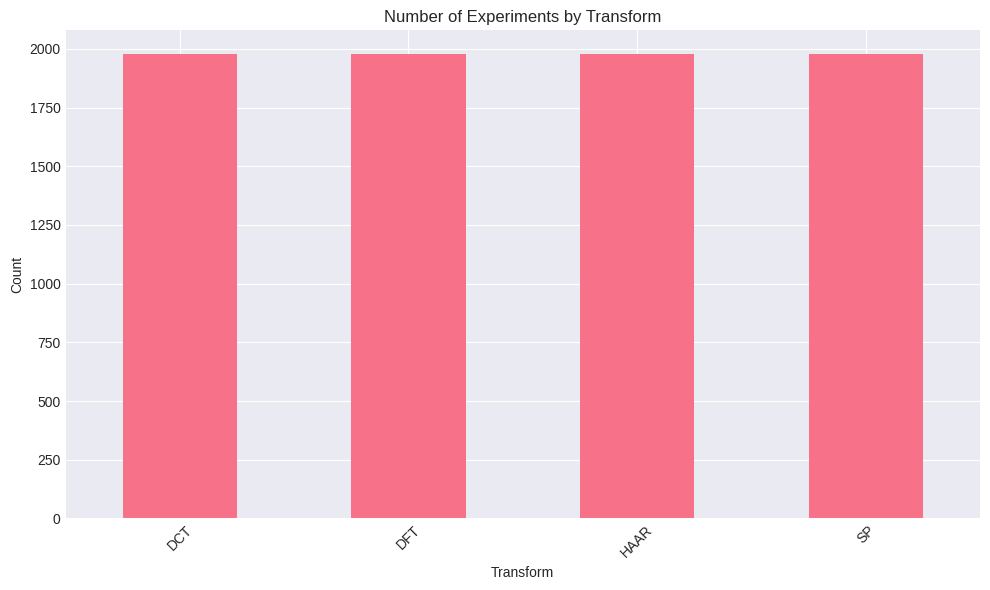

In [6]:
# Count of experiments per transform
transform_counts = df['transform'].value_counts()
print("Number of experiments per transform:")
print(transform_counts)
print("\nVisualization:")
plt.figure(figsize=(10, 6))
transform_counts.plot(kind='bar')
plt.title('Number of Experiments by Transform')
plt.xlabel('Transform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualizations

### Compression Ratio vs Quality Metrics


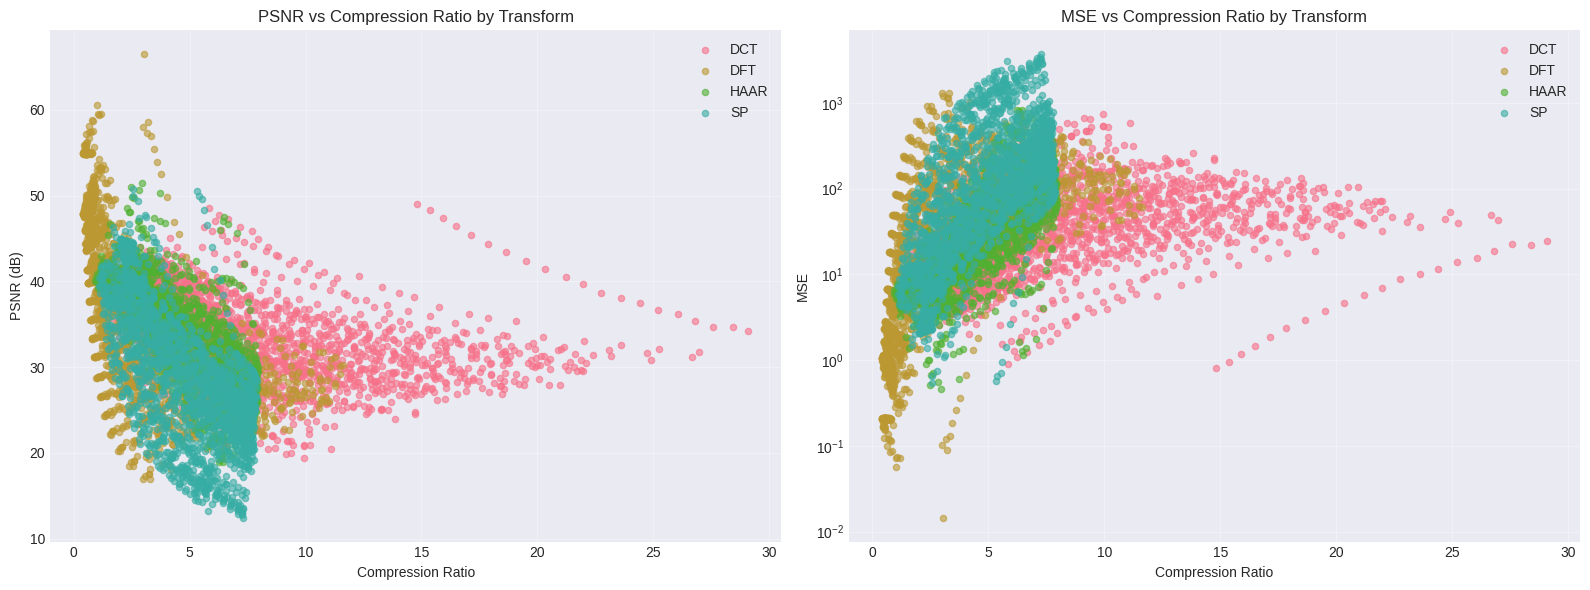

In [7]:
# Scatter plot: Compression Ratio vs PSNR
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PSNR vs Compression Ratio
for transform in df['transform'].unique():
    subset = df[df['transform'] == transform]
    axes[0].scatter(subset['compression_ratio'], subset['psnr'], 
                   label=transform, alpha=0.6, s=20)

axes[0].set_xlabel('Compression Ratio')
axes[0].set_ylabel('PSNR (dB)')
axes[0].set_title('PSNR vs Compression Ratio by Transform')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MSE vs Compression Ratio
for transform in df['transform'].unique():
    subset = df[df['transform'] == transform]
    axes[1].scatter(subset['compression_ratio'], subset['mse'], 
                   label=transform, alpha=0.6, s=20)

axes[1].set_xlabel('Compression Ratio')
axes[1].set_ylabel('MSE')
axes[1].set_title('MSE vs Compression Ratio by Transform')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


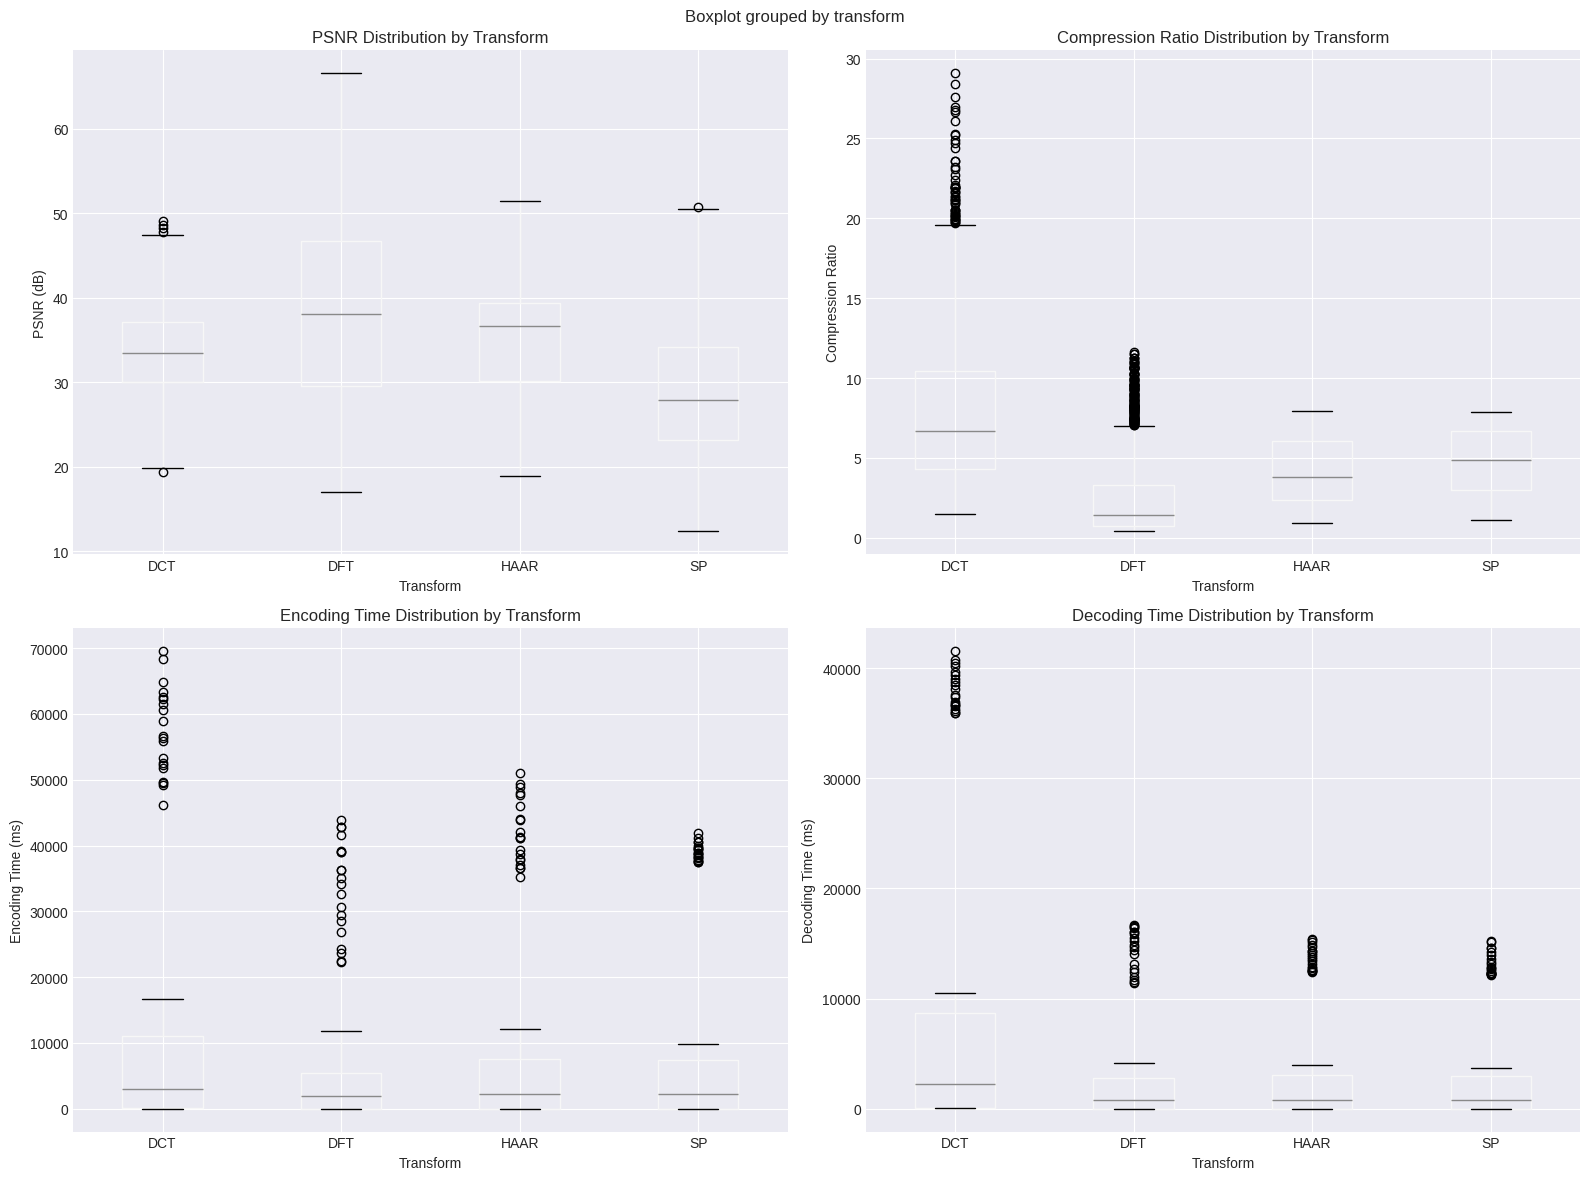

In [8]:
# Box plots comparing metrics across transforms
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PSNR comparison
df.boxplot(column='psnr', by='transform', ax=axes[0, 0])
axes[0, 0].set_title('PSNR Distribution by Transform')
axes[0, 0].set_xlabel('Transform')
axes[0, 0].set_ylabel('PSNR (dB)')

# Compression Ratio comparison
df.boxplot(column='compression_ratio', by='transform', ax=axes[0, 1])
axes[0, 1].set_title('Compression Ratio Distribution by Transform')
axes[0, 1].set_xlabel('Transform')
axes[0, 1].set_ylabel('Compression Ratio')

# Encoding time comparison
df.boxplot(column='encode_ms', by='transform', ax=axes[1, 0])
axes[1, 0].set_title('Encoding Time Distribution by Transform')
axes[1, 0].set_xlabel('Transform')
axes[1, 0].set_ylabel('Encoding Time (ms)')

# Decoding time comparison
df.boxplot(column='decode_ms', by='transform', ax=axes[1, 1])
axes[1, 1].set_title('Decoding Time Distribution by Transform')
axes[1, 1].set_xlabel('Transform')
axes[1, 1].set_ylabel('Decoding Time (ms)')

plt.tight_layout()
plt.show()


### Entropy Analysis


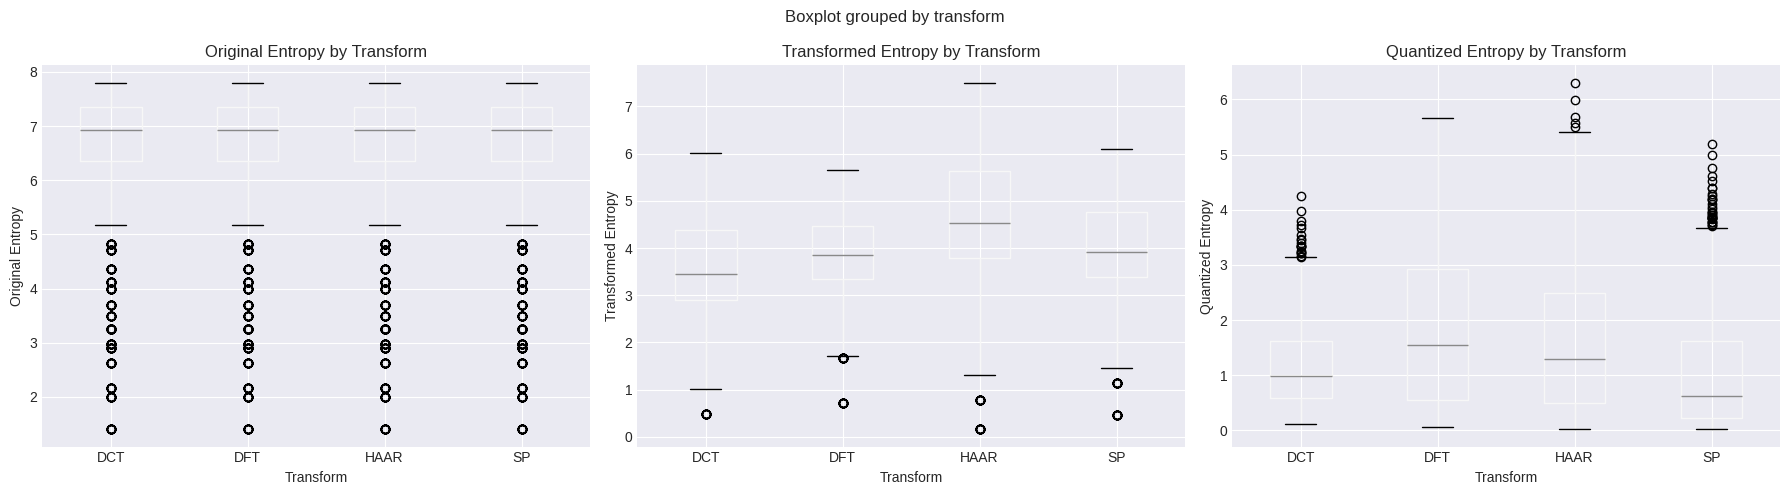

In [9]:
# Entropy comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original entropy
df.boxplot(column='original_entropy', by='transform', ax=axes[0])
axes[0].set_title('Original Entropy by Transform')
axes[0].set_xlabel('Transform')
axes[0].set_ylabel('Original Entropy')

# Transformed entropy
df.boxplot(column='transformed_entropy', by='transform', ax=axes[1])
axes[1].set_title('Transformed Entropy by Transform')
axes[1].set_xlabel('Transform')
axes[1].set_ylabel('Transformed Entropy')

# Quantized entropy
df.boxplot(column='quantized_entropy', by='transform', ax=axes[2])
axes[2].set_title('Quantized Entropy by Transform')
axes[2].set_xlabel('Transform')
axes[2].set_ylabel('Quantized Entropy')

plt.tight_layout()
plt.show()


### Performance Analysis


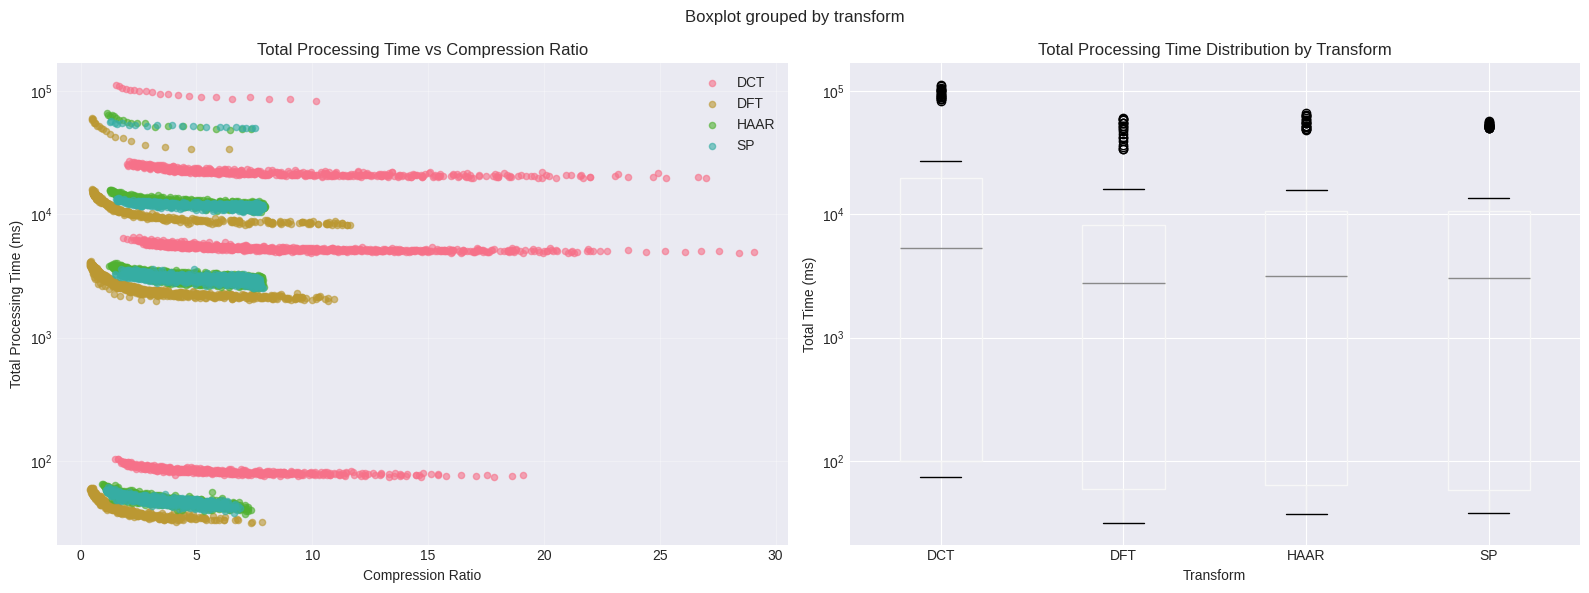

In [10]:
# Total processing time (encode + decode)
df['total_time_ms'] = df['encode_ms'] + df['decode_ms']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total time vs Compression Ratio
for transform in df['transform'].unique():
    subset = df[df['transform'] == transform]
    axes[0].scatter(subset['compression_ratio'], subset['total_time_ms'], 
                   label=transform, alpha=0.6, s=20)

axes[0].set_xlabel('Compression Ratio')
axes[0].set_ylabel('Total Processing Time (ms)')
axes[0].set_title('Total Processing Time vs Compression Ratio')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# Total time distribution by transform
df.boxplot(column='total_time_ms', by='transform', ax=axes[1])
axes[1].set_title('Total Processing Time Distribution by Transform')
axes[1].set_xlabel('Transform')
axes[1].set_ylabel('Total Time (ms)')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


## Correlation Analysis


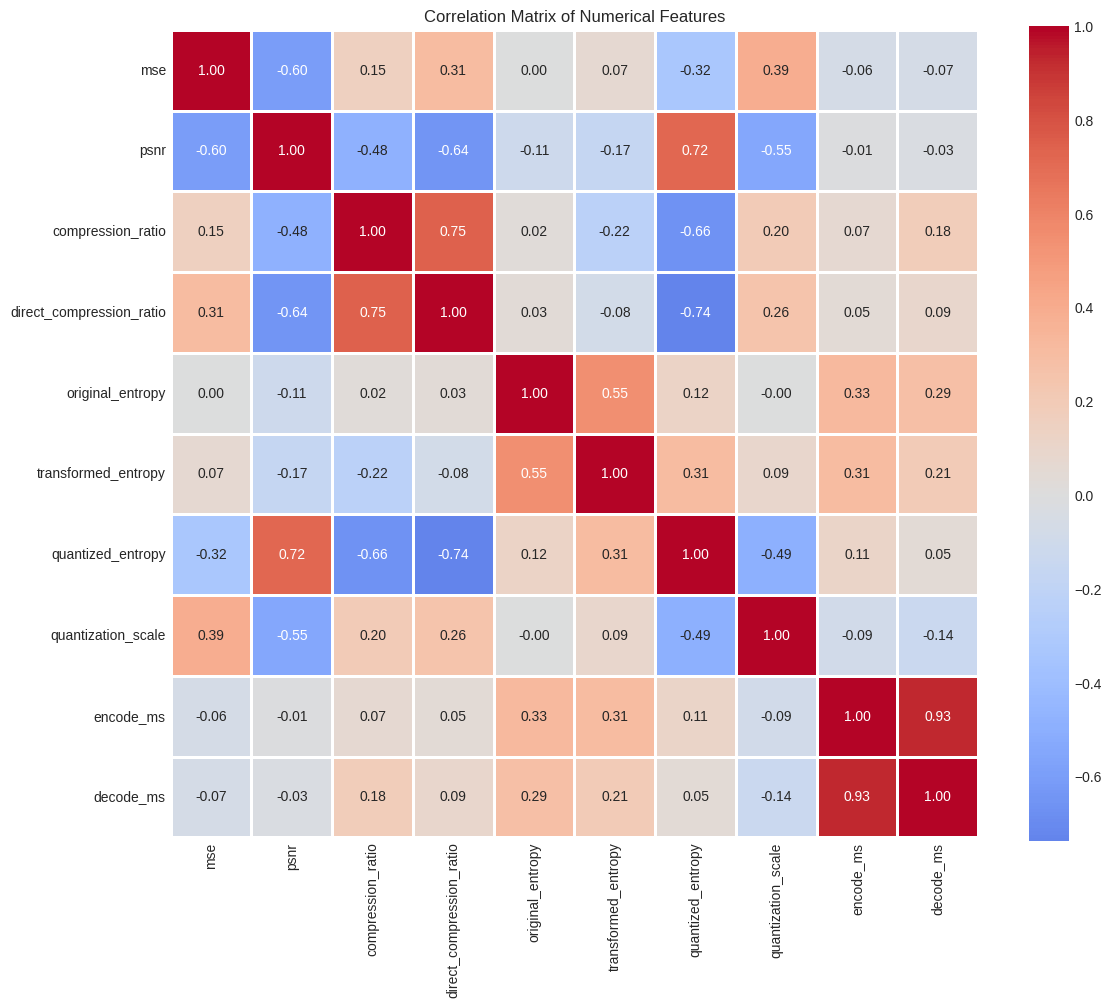

In [11]:
# Correlation matrix for numerical columns
numerical_cols = ['mse', 'psnr', 'compression_ratio', 'direct_compression_ratio',
                  'original_entropy', 'transformed_entropy', 'quantized_entropy',
                  'quantization_scale', 'encode_ms', 'decode_ms']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


## Analysis by Dataset


In [12]:
# Statistics by dataset
dataset_stats = df.groupby('dataset').agg({
    'mse': 'mean',
    'psnr': 'mean',
    'compression_ratio': 'mean',
    'total_time_ms': 'mean'
}).round(4)

print("Average metrics by dataset:")
dataset_stats


Average metrics by dataset:


,mse,psnr,compression_ratio,total_time_ms
dataset,,,,
SquaredAerialImages,72.3041,33.3964,5.2778,13860.3839
SquaredIconsSample,137.2499,34.3922,3.8873,56.0158
SquaredKodak,70.9234,34.2982,5.5085,3617.8965
SquaredTextureImages,177.2183,33.2190,4.7636,6148.4937


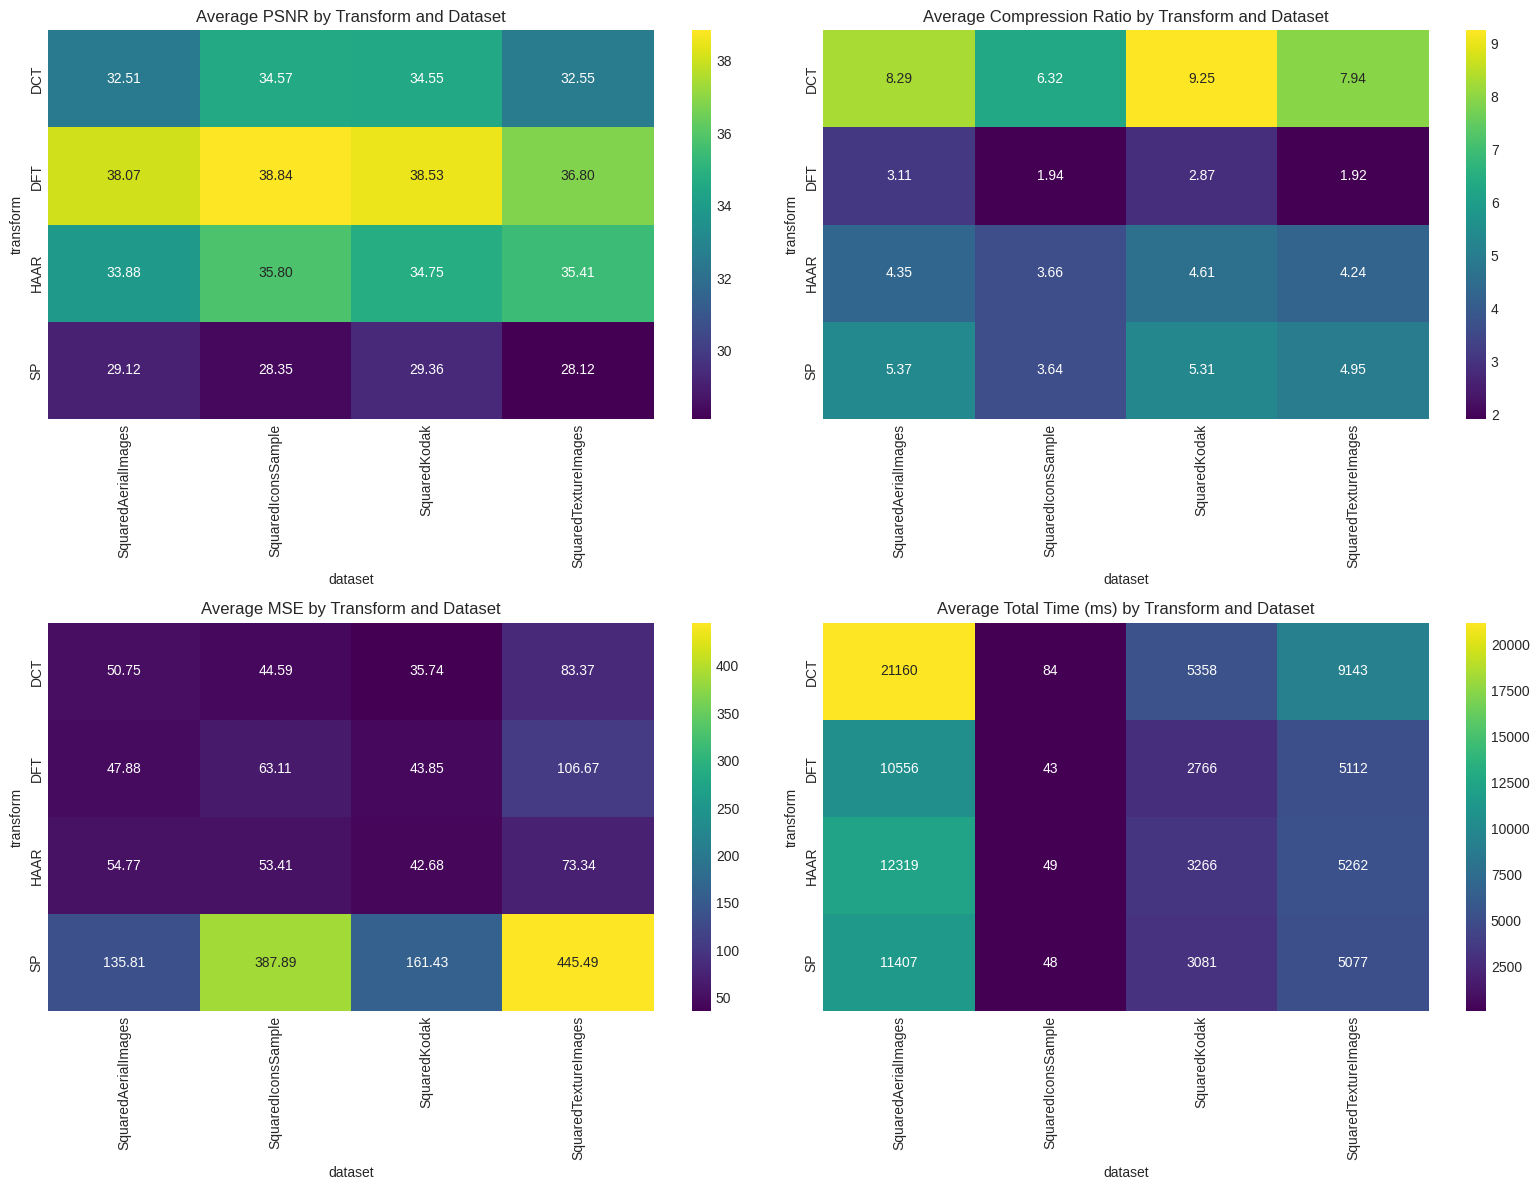

In [13]:
# Combined analysis: Transform and Dataset
if df['dataset'].nunique() > 1:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # PSNR by transform and dataset
    pivot_psnr = df.pivot_table(values='psnr', index='transform', columns='dataset', aggfunc='mean')
    sns.heatmap(pivot_psnr, annot=True, fmt='.2f', cmap='viridis', ax=axes[0, 0])
    axes[0, 0].set_title('Average PSNR by Transform and Dataset')
    
    # Compression ratio by transform and dataset
    pivot_cr = df.pivot_table(values='compression_ratio', index='transform', columns='dataset', aggfunc='mean')
    sns.heatmap(pivot_cr, annot=True, fmt='.2f', cmap='viridis', ax=axes[0, 1])
    axes[0, 1].set_title('Average Compression Ratio by Transform and Dataset')
    
    # MSE by transform and dataset
    pivot_mse = df.pivot_table(values='mse', index='transform', columns='dataset', aggfunc='mean')
    sns.heatmap(pivot_mse, annot=True, fmt='.2f', cmap='viridis', ax=axes[1, 0])
    axes[1, 0].set_title('Average MSE by Transform and Dataset')
    
    # Total time by transform and dataset
    pivot_time = df.pivot_table(values='total_time_ms', index='transform', columns='dataset', aggfunc='mean')
    sns.heatmap(pivot_time, annot=True, fmt='.0f', cmap='viridis', ax=axes[1, 1])
    axes[1, 1].set_title('Average Total Time (ms) by Transform and Dataset')
    
    plt.tight_layout()
    plt.show()
else:
    print("Only one dataset found, skipping combined analysis.")


## HAAR Transform Specific Analysis


Number of HAAR data points: 1980

HAAR data statistics:
       direct_compression_ratio         psnr          mse  compression_ratio
count               1980.000000  1980.000000  1980.000000        1980.000000
mean                   4.778242    34.965373    56.188201           4.210452
std                    2.015801     5.966926    97.310107           2.046027
min                    1.237710    18.906000     0.465088           0.941465
25%                    2.909830    30.147600     7.524477           2.393617
50%                    4.683430    36.629150    14.130800           3.832665
75%                    6.707420    39.366050    62.853250           6.072315
max                    7.970410    51.455500   836.524000           7.950910


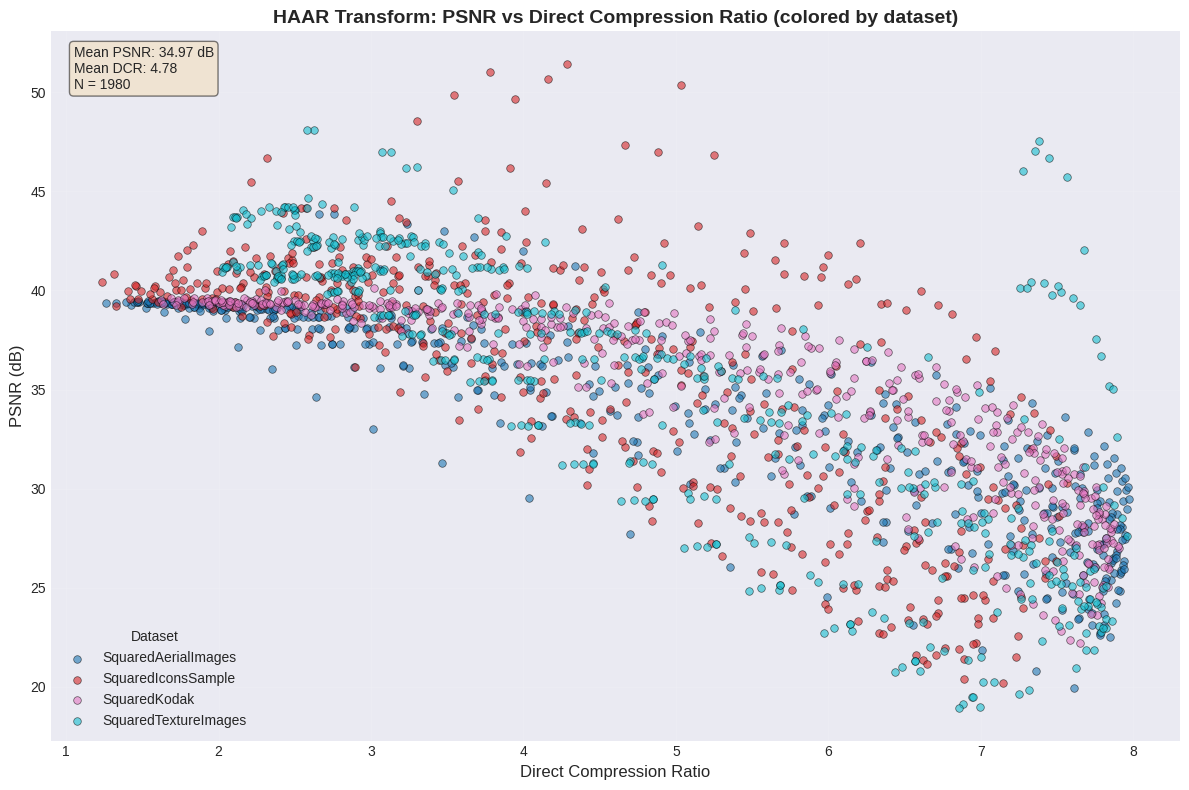

In [ ]:
# Filter data for HAAR transform only
haar_data = df[df['transform'] == 'HAAR'].copy()

print(f"Number of HAAR data points: {len(haar_data)}")
print(f"\nHAAR data statistics:")
print(haar_data[['direct_compression_ratio', 'psnr', 'mse', 'compression_ratio']].describe())

# Get unique datasets and assign colors
datasets = haar_data['dataset'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))

# Scatter plot: Direct Compression Ratio vs PSNR for HAAR transform, colored by dataset
plt.figure(figsize=(12, 8))

for i, dataset in enumerate(datasets):
    dataset_data = haar_data[haar_data['dataset'] == dataset]
    plt.scatter(dataset_data['direct_compression_ratio'], dataset_data['psnr'], 
               alpha=0.6, s=30, edgecolors='black', linewidth=0.5,
               label=dataset, color=colors[i])

plt.xlabel('Direct Compression Ratio', fontsize=12)
plt.ylabel('PSNR (dB)', fontsize=12)
plt.title('HAAR Transform: PSNR vs Direct Compression Ratio (colored by dataset)', fontsize=14, fontweight='bold')
plt.legend(title='Dataset', fontsize=10)
plt.grid(True, alpha=0.1)
plt.xlim(right=10)

# Add some statistics as text
mean_psnr = haar_data['psnr'].mean()
mean_dcr = haar_data['direct_compression_ratio'].mean()
plt.text(0.02, 0.98, f'Mean PSNR: {mean_psnr:.2f} dB\nMean DCR: {mean_dcr:.2f}\nN = {len(haar_data)}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


Grouped data preview:
               dataset  quantization_scale  direct_compression_ratio  \
0  SquaredAerialImages            0.769231                  1.665406   
1  SquaredAerialImages            1.000000                  1.767022   
2  SquaredAerialImages            1.300000                  1.955940   
3  SquaredAerialImages            1.690000                  2.145610   
4  SquaredAerialImages            2.197000                  2.374065   
5  SquaredAerialImages            2.856100                  2.625332   
6  SquaredAerialImages            3.712930                  2.976422   
7  SquaredAerialImages            4.826809                  3.381204   
8  SquaredAerialImages            6.274852                  3.963457   
9  SquaredAerialImages            8.157307                  4.551293   

        psnr  
0  39.582188  
1  39.536256  
2  39.379124  
3  39.310248  
4  39.163256  
5  38.815280  
6  38.250184  
7  37.531736  
8  36.413272  
9  35.247400  

Number of unique qu

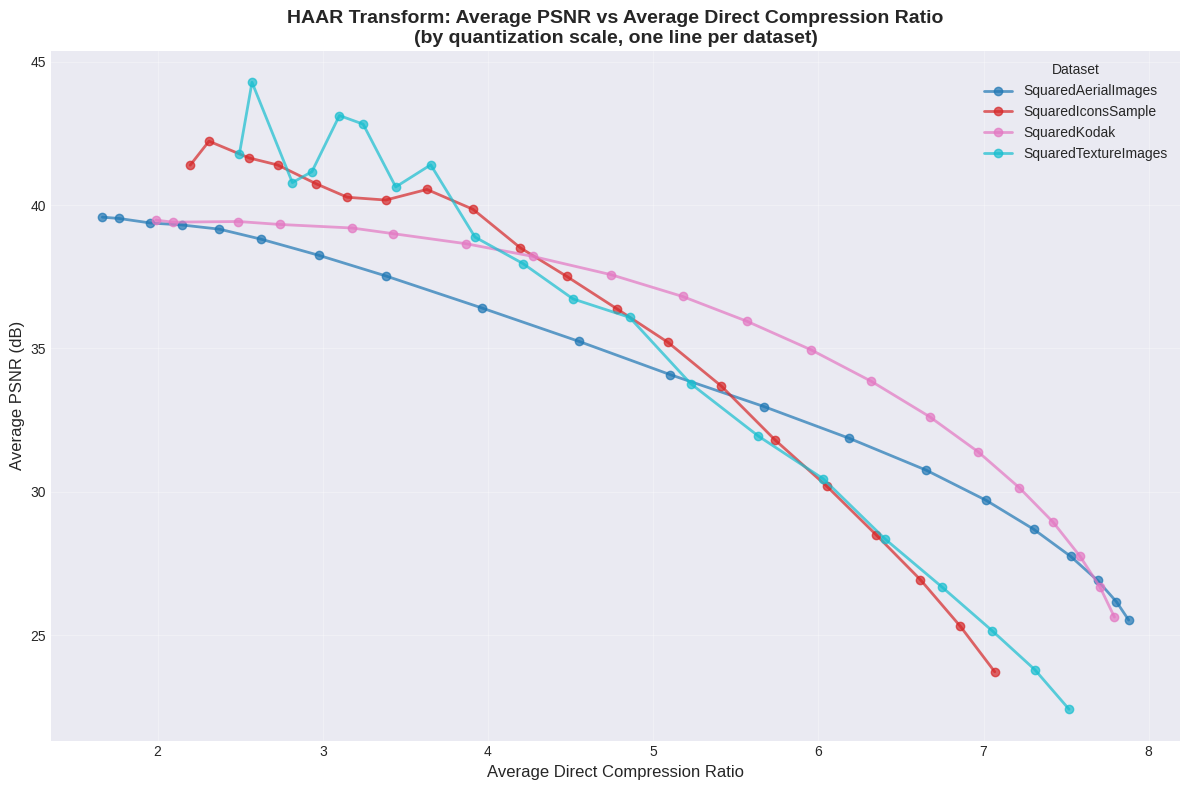

In [ ]:
# Group HAAR data by dataset and quantization_scale, then compute averages
haar_grouped = haar_data.groupby(['dataset', 'quantization_scale']).agg({
    'direct_compression_ratio': 'mean',
    'psnr': 'mean'
}).reset_index()

# Sort by quantization_scale for each dataset to create smooth lines
haar_grouped = haar_grouped.sort_values(['dataset', 'quantization_scale'])

print("Grouped data preview:")
print(haar_grouped.head(10))
print(f"\nNumber of unique quantization scales: {haar_grouped['quantization_scale'].nunique()}")
print(f"Number of datasets: {haar_grouped['dataset'].nunique()}")

# Create line plot: one line per dataset
plt.figure(figsize=(12, 8))

datasets = haar_grouped['dataset'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))

for i, dataset in enumerate(datasets):
    dataset_data = haar_grouped[haar_grouped['dataset'] == dataset]
    plt.plot(dataset_data['direct_compression_ratio'], dataset_data['psnr'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=dataset, color=colors[i])

plt.xlabel('Average Direct Compression Ratio', fontsize=12)
plt.ylabel('Average PSNR (dB)', fontsize=12)
plt.title('HAAR Transform: Average PSNR vs Average Direct Compression Ratio\n(by quantization scale, one line per dataset)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Dataset', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(right=10)

plt.tight_layout()
plt.show()


Grouped data preview (MSE):
               dataset  quantization_scale  direct_compression_ratio  \
0  SquaredAerialImages            0.769231                  1.665406   
1  SquaredAerialImages            1.000000                  1.767022   
2  SquaredAerialImages            1.300000                  1.955940   
3  SquaredAerialImages            1.690000                  2.145610   
4  SquaredAerialImages            2.197000                  2.374065   
5  SquaredAerialImages            2.856100                  2.625332   
6  SquaredAerialImages            3.712930                  2.976422   
7  SquaredAerialImages            4.826809                  3.381204   
8  SquaredAerialImages            6.274852                  3.963457   
9  SquaredAerialImages            8.157307                  4.551293   

         mse  
0   7.268804  
1   7.348252  
2   7.523460  
3   7.726803  
4   7.983727  
5   8.651500  
6   9.847462  
7  11.620041  
8  14.962998  
9  19.647328  


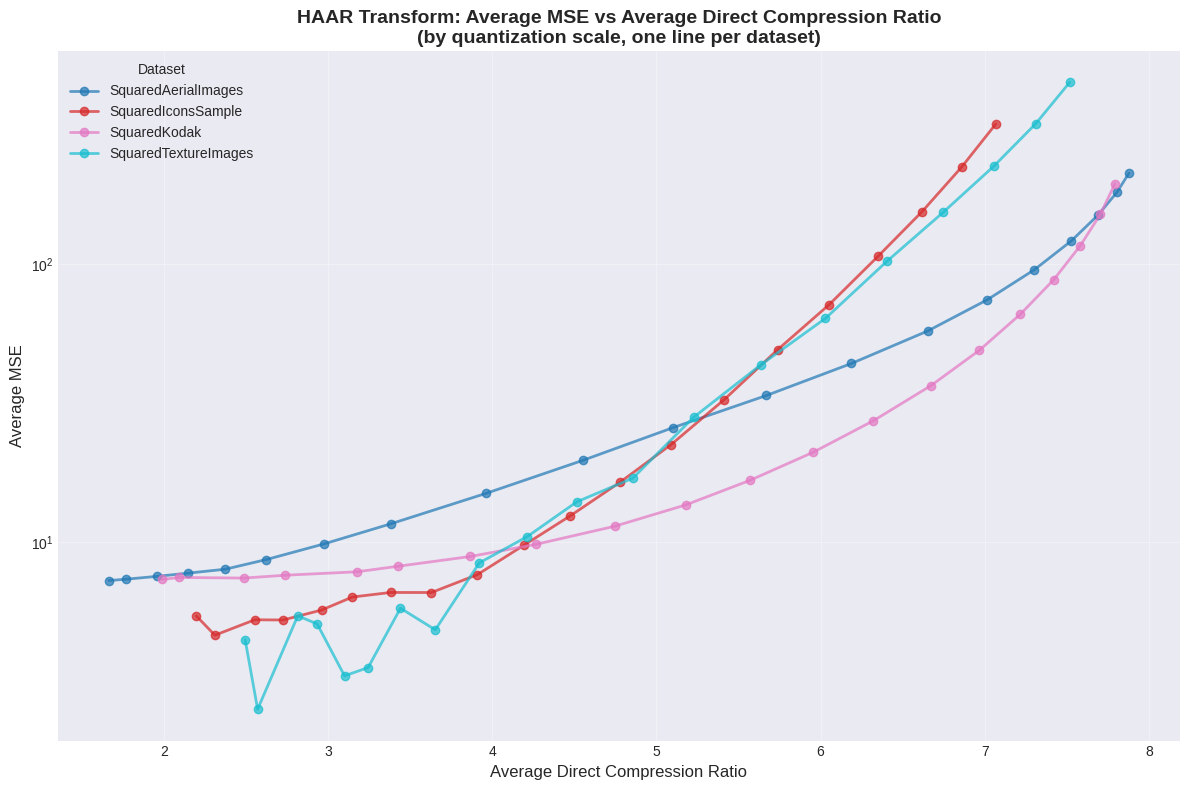

In [ ]:
# Group HAAR data by dataset and quantization_scale, then compute averages for MSE
haar_grouped_mse = haar_data.groupby(['dataset', 'quantization_scale']).agg({
    'direct_compression_ratio': 'mean',
    'mse': 'mean'
}).reset_index()

# Sort by quantization_scale for each dataset to create smooth lines
haar_grouped_mse = haar_grouped_mse.sort_values(['dataset', 'quantization_scale'])

print("Grouped data preview (MSE):")
print(haar_grouped_mse.head(10))

# Create line plot: one line per dataset with MSE
plt.figure(figsize=(12, 8))

datasets = haar_grouped_mse['dataset'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))

for i, dataset in enumerate(datasets):
    dataset_data = haar_grouped_mse[haar_grouped_mse['dataset'] == dataset]
    plt.plot(dataset_data['direct_compression_ratio'], dataset_data['mse'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=dataset, color=colors[i])

plt.xlabel('Average Direct Compression Ratio', fontsize=12)
plt.ylabel('Average MSE', fontsize=12)
plt.title('HAAR Transform: Average MSE vs Average Direct Compression Ratio\n(by quantization scale, one line per dataset)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Dataset', fontsize=10)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale for MSE since it can vary widely
plt.xlim(right=10)

plt.tight_layout()
plt.show()


## Aerial Images Dataset: Comparison Across All Transforms


Number of aerial images data points (excluding DFT): 1000

Transforms in aerial images dataset: ['DCT' 'HAAR']

Aerial images data statistics:
          direct_compression_ratio                                         \
                             count      mean       std      min       25%   
transform                                                                   
DCT                          500.0  5.175097  1.476935  1.87380  3.922907   
HAAR                         500.0  4.811960  2.328990  1.26076  2.458360   

                                         psnr                                \
                50%       75%      max  count       mean       std      min   
transform                                                                     
DCT        5.330585  6.476135  7.53396  500.0  32.508808  3.450361  22.1563   
HAAR       4.759710  7.252512  7.97041  500.0  33.883149  5.136022  19.9204   

                                                     mse             \
    

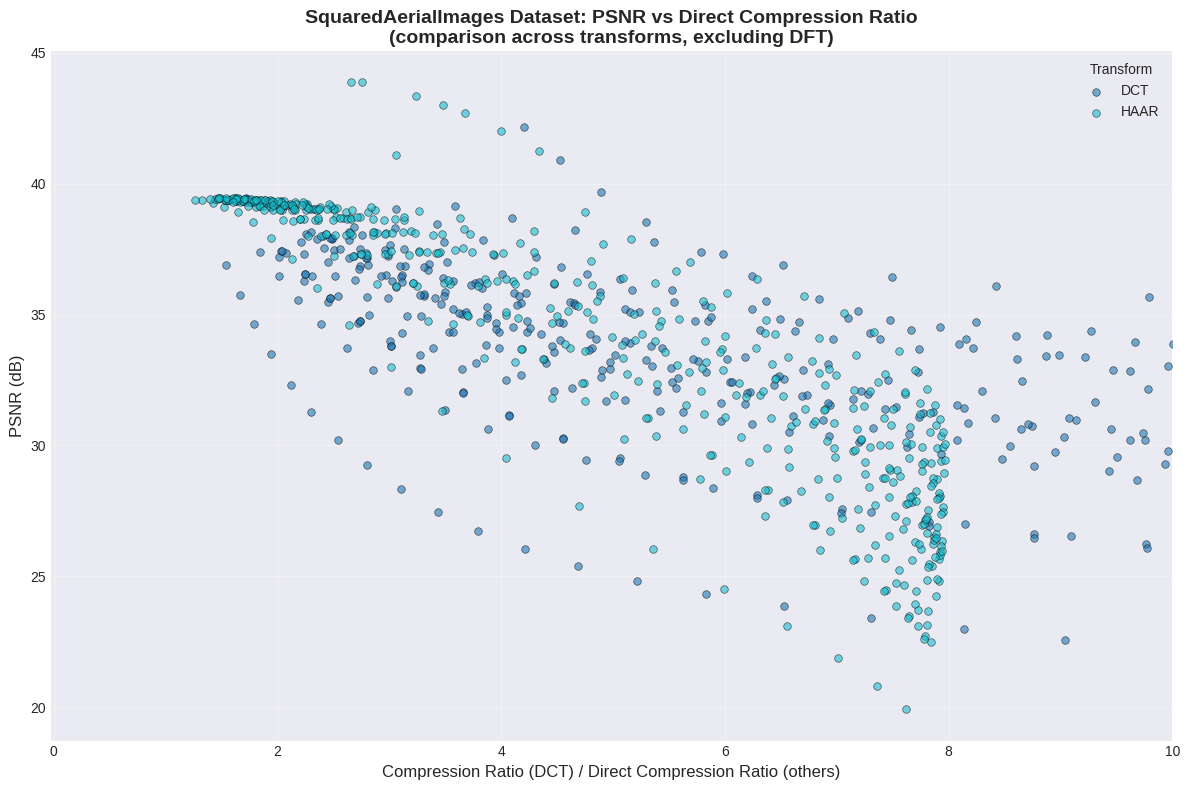

In [55]:
# Filter data for SquaredAerialImages dataset only, excluding DFT transform
aerial_data = df[(df['dataset'] == 'SquaredAerialImages') & (df['transform'] != 'SP') & (df['transform'] != 'DFT')].copy()

print(f"Number of aerial images data points (excluding DFT): {len(aerial_data)}")
print(f"\nTransforms in aerial images dataset: {aerial_data['transform'].unique()}")
print(f"\nAerial images data statistics:")
print(aerial_data[['transform', 'direct_compression_ratio', 'psnr', 'mse', 'compression_ratio']].groupby('transform').describe())

# Scatter plot: Direct Compression Ratio vs PSNR for all transforms on aerial images
plt.figure(figsize=(12, 8))

transforms = aerial_data['transform'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(transforms)))

for i, transform in enumerate(transforms):
    transform_data = aerial_data[aerial_data['transform'] == transform]
    # Use compression_ratio for DCT, direct_compression_ratio for others
    x_col = 'compression_ratio' if transform == 'DCT' else 'direct_compression_ratio'
    plt.scatter(transform_data[x_col], transform_data['psnr'], 
               alpha=0.6, s=30, edgecolors='black', linewidth=0.5,
               label=transform, color=colors[i])

plt.xlabel('Compression Ratio (DCT) / Direct Compression Ratio (others)', fontsize=12)
plt.ylabel('PSNR (dB)', fontsize=12)
plt.title('SquaredAerialImages Dataset: PSNR vs Direct Compression Ratio\n(comparison across transforms, excluding DFT)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Transform', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(right=10)

plt.tight_layout()
plt.show()


Grouped data preview (PSNR):
  transform  quantization_scale  compression_ratio  direct_compression_ratio  \
0       DCT            0.100000           2.500860                  2.804189   
1       DCT            0.120000           2.796954                  3.050381   
2       DCT            0.144000           3.105095                  3.300165   
3       DCT            0.172800           3.481270                  3.566691   
4       DCT            0.207360           3.855936                  3.818530   
5       DCT            0.248832           4.199890                  4.043925   
6       DCT            0.298598           4.732724                  4.338797   
7       DCT            0.358318           5.274348                  4.611238   
8       DCT            0.429982           5.937398                  4.904571   
9       DCT            0.515978           6.599914                  5.162197   

        psnr    x_axis  
0  38.033152  2.500860  
1  37.276592  2.796954  
2  36.561324  3

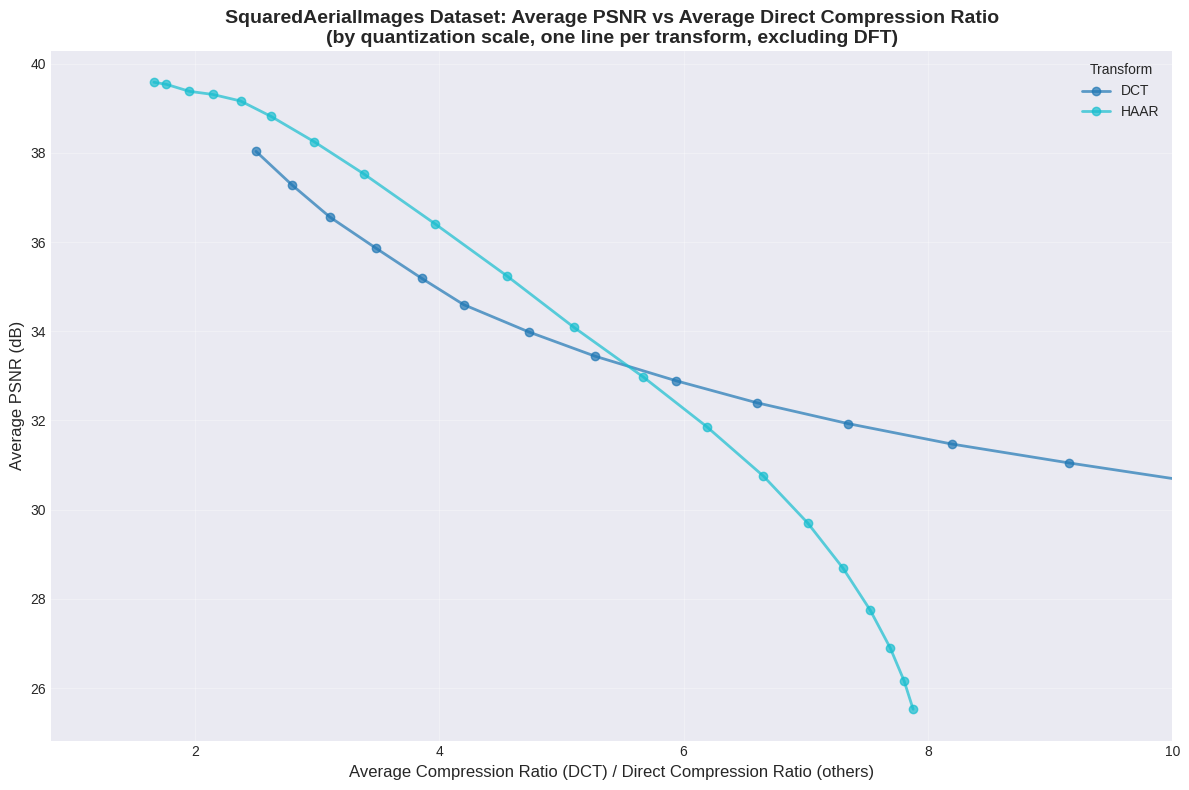

In [56]:
# Group aerial images data by transform and quantization_scale, then compute averages
# For DCT use compression_ratio, for others use direct_compression_ratio
aerial_grouped = aerial_data.groupby(['transform', 'quantization_scale']).agg({
    'compression_ratio': 'mean',
    'direct_compression_ratio': 'mean',
    'psnr': 'mean'
}).reset_index()

# Create a column that uses compression_ratio for DCT, direct_compression_ratio for others
aerial_grouped['x_axis'] = aerial_grouped.apply(
    lambda row: row['compression_ratio'] if row['transform'] == 'DCT' else row['direct_compression_ratio'],
    axis=1
)

# Sort by quantization_scale for each transform to create smooth lines
aerial_grouped = aerial_grouped.sort_values(['transform', 'quantization_scale'])

print("Grouped data preview (PSNR):")
print(aerial_grouped.head(10))
print(f"\nNumber of unique quantization scales: {aerial_grouped['quantization_scale'].nunique()}")
print(f"Number of transforms: {aerial_grouped['transform'].nunique()}")

# Create line plot: one line per transform
plt.figure(figsize=(12, 8))

transforms = aerial_grouped['transform'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(transforms)))

for i, transform in enumerate(transforms):
    transform_data = aerial_grouped[aerial_grouped['transform'] == transform]
    plt.plot(transform_data['x_axis'], transform_data['psnr'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=transform, color=colors[i])

plt.xlabel('Average Compression Ratio (DCT) / Direct Compression Ratio (others)', fontsize=12)
plt.ylabel('Average PSNR (dB)', fontsize=12)
plt.title('SquaredAerialImages Dataset: Average PSNR vs Average Direct Compression Ratio\n(by quantization scale, one line per transform, excluding DFT)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Transform', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(right=10)

plt.tight_layout()
plt.show()


## Texture Images Dataset: Comparison Across All Transforms


## Kodak Images Dataset: Comparison Across All Transforms


Number of Kodak images data points (excluding DFT): 960

Transforms in Kodak images dataset: ['DCT' 'HAAR']

Grouped data preview (PSNR):
  transform  quantization_scale  compression_ratio  direct_compression_ratio  \
0       DCT            0.100000           3.461715                  3.446623   
1       DCT            0.120000           3.799780                  3.677712   
2       DCT            0.144000           4.215555                  3.941078   
3       DCT            0.172800           4.643388                  4.182001   
4       DCT            0.207360           5.050328                  4.403433   
5       DCT            0.248832           5.404444                  4.596623   
6       DCT            0.298598           6.005069                  4.848105   
7       DCT            0.358318           6.579351                  5.078377   
8       DCT            0.429982           7.296571                  5.325675   
9       DCT            0.515978           7.943990            

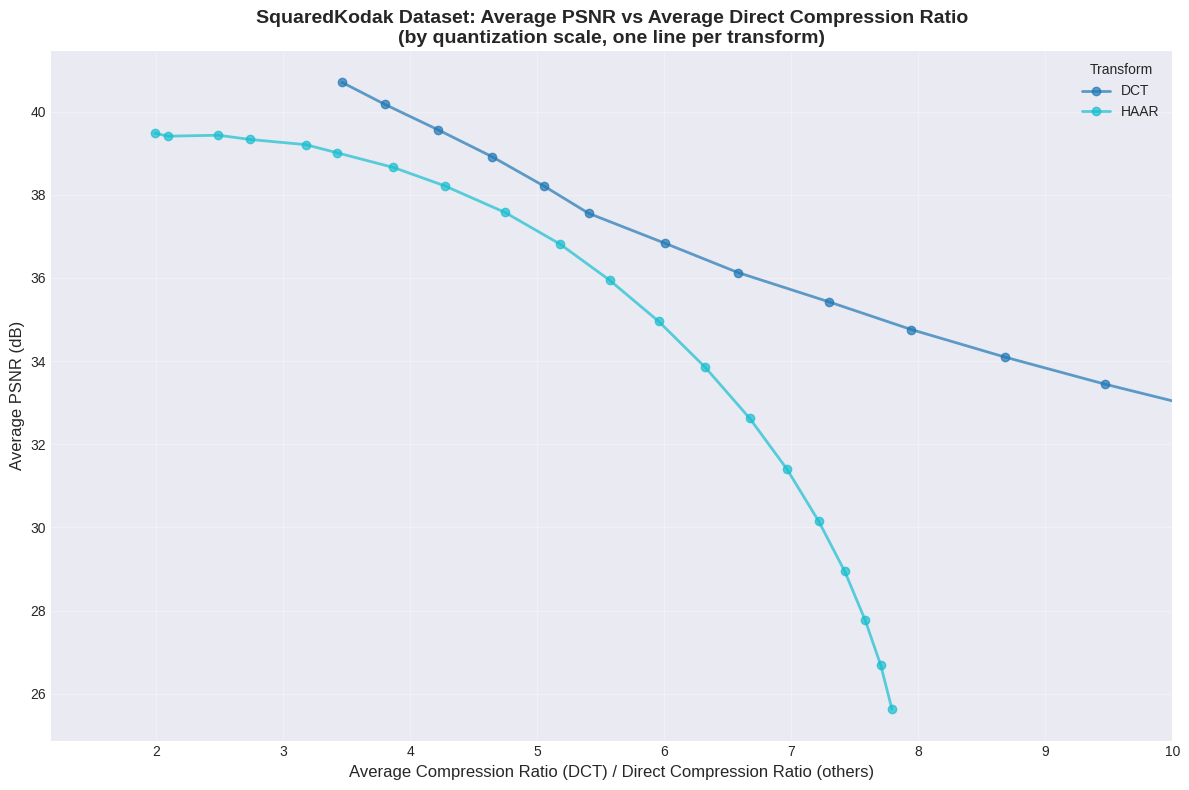

In [54]:
# Filter data for SquaredKodak dataset only, excluding DFT transform
kodak_data = df[(df['dataset'] == 'SquaredKodak') & (df['transform'] != 'SP') & (df['transform'] != 'DFT')].copy()

print(f"Number of Kodak images data points (excluding DFT): {len(kodak_data)}")
print(f"\nTransforms in Kodak images dataset: {kodak_data['transform'].unique()}")

# Group Kodak images data by transform and quantization_scale, then compute averages
# For DCT use compression_ratio, for others use direct_compression_ratio
kodak_grouped = kodak_data.groupby(['transform', 'quantization_scale']).agg({
    'compression_ratio': 'mean',
    'direct_compression_ratio': 'mean',
    'psnr': 'mean'
}).reset_index()

# Create a column that uses compression_ratio for DCT, direct_compression_ratio for others
kodak_grouped['x_axis'] = kodak_grouped.apply(
    lambda row: row['compression_ratio'] if row['transform'] == 'DCT' else row['direct_compression_ratio'],
    axis=1
)

# Sort by quantization_scale for each transform to create smooth lines
kodak_grouped = kodak_grouped.sort_values(['transform', 'quantization_scale'])

print("\nGrouped data preview (PSNR):")
print(kodak_grouped.head(10))
print(f"\nNumber of unique quantization scales: {kodak_grouped['quantization_scale'].nunique()}")
print(f"Number of transforms: {kodak_grouped['transform'].nunique()}")

# Create line plot: one line per transform
plt.figure(figsize=(12, 8))

transforms = kodak_grouped['transform'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(transforms)))

for i, transform in enumerate(transforms):
    transform_data = kodak_grouped[kodak_grouped['transform'] == transform]
    plt.plot(transform_data['x_axis'], transform_data['psnr'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=transform, color=colors[i])

plt.xlabel('Average Compression Ratio (DCT) / Direct Compression Ratio (others)', fontsize=12)
plt.ylabel('Average PSNR (dB)', fontsize=12)
plt.title('SquaredKodak Dataset: Average PSNR vs Average Direct Compression Ratio\n(by quantization scale, one line per transform)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Transform', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(right=10)

plt.tight_layout()
plt.show()


## Icons Dataset: Comparison Across All Transforms


Number of Icons images data points (excluding DFT): 1500

Transforms in Icons images dataset: ['DCT' 'HAAR' 'SP']

Grouped data preview (PSNR):
  transform  quantization_scale  compression_ratio  direct_compression_ratio  \
0       DCT            0.100000           2.975906                  2.790707   
1       DCT            0.120000           3.189890                  2.948776   
2       DCT            0.144000           3.421641                  3.102930   
3       DCT            0.172800           3.676847                  3.266232   
4       DCT            0.207360           3.932168                  3.433785   
5       DCT            0.248832           4.176407                  3.592376   
6       DCT            0.298598           4.494772                  3.782990   
7       DCT            0.358318           4.822496                  3.959276   
8       DCT            0.429982           5.211766                  4.160023   
9       DCT            0.515978           5.590913      

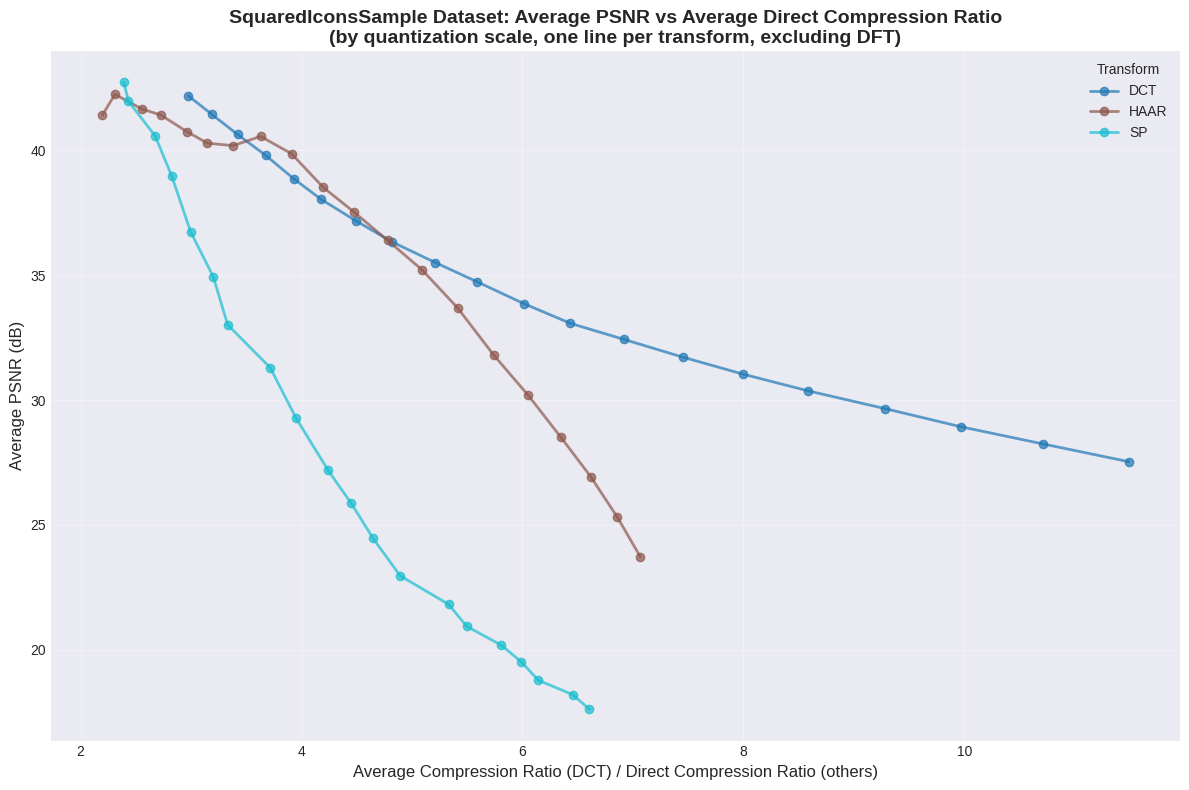

In [44]:
# Filter data for SquaredIconsSample dataset only, excluding DFT transform
icons_data = df[(df['dataset'] == 'SquaredIconsSample') & (df['transform'] != 'DFT')].copy()

print(f"Number of Icons images data points (excluding DFT): {len(icons_data)}")
print(f"\nTransforms in Icons images dataset: {icons_data['transform'].unique()}")

# Group Icons images data by transform and quantization_scale, then compute averages
# For DCT use compression_ratio, for others use direct_compression_ratio
icons_grouped = icons_data.groupby(['transform', 'quantization_scale']).agg({
    'compression_ratio': 'mean',
    'direct_compression_ratio': 'mean',
    'psnr': 'mean'
}).reset_index()

# Create a column that uses compression_ratio for DCT, direct_compression_ratio for others
icons_grouped['x_axis'] = icons_grouped.apply(
    lambda row: row['compression_ratio'] if row['transform'] == 'DCT' else row['direct_compression_ratio'],
    axis=1
)

# Sort by quantization_scale for each transform to create smooth lines
icons_grouped = icons_grouped.sort_values(['transform', 'quantization_scale'])

print("\nGrouped data preview (PSNR):")
print(icons_grouped.head(10))
print(f"\nNumber of unique quantization scales: {icons_grouped['quantization_scale'].nunique()}")
print(f"Number of transforms: {icons_grouped['transform'].nunique()}")

# Create line plot: one line per transform
plt.figure(figsize=(12, 8))

transforms = icons_grouped['transform'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(transforms)))

for i, transform in enumerate(transforms):
    transform_data = icons_grouped[icons_grouped['transform'] == transform]
    plt.plot(transform_data['x_axis'], transform_data['psnr'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=transform, color=colors[i])

plt.xlabel('Average Compression Ratio (DCT) / Direct Compression Ratio (others)', fontsize=12)
plt.ylabel('Average PSNR (dB)', fontsize=12)
plt.title('SquaredIconsSample Dataset: Average PSNR vs Average Direct Compression Ratio\n(by quantization scale, one line per transform, excluding DFT)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Transform', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Trade-off Analysis: Quality vs Compression vs Speed


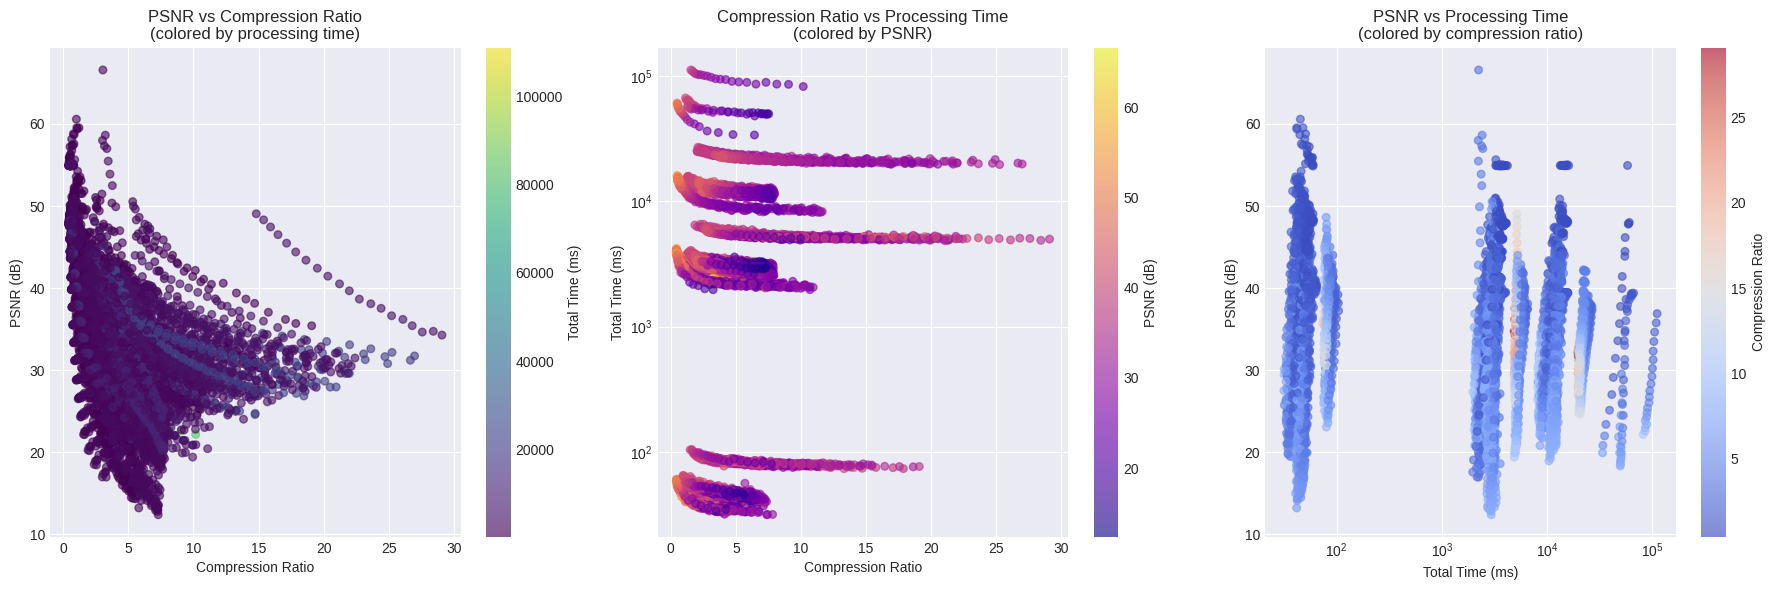

In [14]:
# 3D scatter plot or 2D projections showing trade-offs
fig = plt.figure(figsize=(18, 6))

# PSNR vs Compression Ratio (colored by total time)
ax1 = fig.add_subplot(131)
scatter = ax1.scatter(df['compression_ratio'], df['psnr'], 
                     c=df['total_time_ms'], cmap='viridis', 
                     alpha=0.6, s=30)
ax1.set_xlabel('Compression Ratio')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('PSNR vs Compression Ratio\n(colored by processing time)')
plt.colorbar(scatter, ax=ax1, label='Total Time (ms)')

# Compression Ratio vs Total Time (colored by PSNR)
ax2 = fig.add_subplot(132)
scatter = ax2.scatter(df['compression_ratio'], df['total_time_ms'], 
                     c=df['psnr'], cmap='plasma', 
                     alpha=0.6, s=30)
ax2.set_xlabel('Compression Ratio')
ax2.set_ylabel('Total Time (ms)')
ax2.set_title('Compression Ratio vs Processing Time\n(colored by PSNR)')
ax2.set_yscale('log')
plt.colorbar(scatter, ax=ax2, label='PSNR (dB)')

# PSNR vs Total Time (colored by compression ratio)
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(df['total_time_ms'], df['psnr'], 
                     c=df['compression_ratio'], cmap='coolwarm', 
                     alpha=0.6, s=30)
ax3.set_xlabel('Total Time (ms)')
ax3.set_ylabel('PSNR (dB)')
ax3.set_title('PSNR vs Processing Time\n(colored by compression ratio)')
ax3.set_xscale('log')
plt.colorbar(scatter, ax=ax3, label='Compression Ratio')

plt.tight_layout()
plt.show()


## HAAR vs DCT Comparison: Quantized Entropy vs PSNR


Number of HAAR and DCT data points: 3960

Transforms: ['DCT' 'HAAR']

Grouped data preview:
  transform  quantization_scale  quantized_entropy       psnr
0       DCT            0.100000           2.332069  40.825673
1       DCT            0.120000           2.155118  39.995171
2       DCT            0.144000           1.986475  39.142460
3       DCT            0.172800           1.829497  38.277700
4       DCT            0.207360           1.690065  37.367940
5       DCT            0.248832           1.577005  36.563634
6       DCT            0.298598           1.436099  35.727045
7       DCT            0.358318           1.314354  34.941962
8       DCT            0.429982           1.194327  34.176189
9       DCT            0.515978           1.091971  33.464460

Number of unique quantization scales: 40


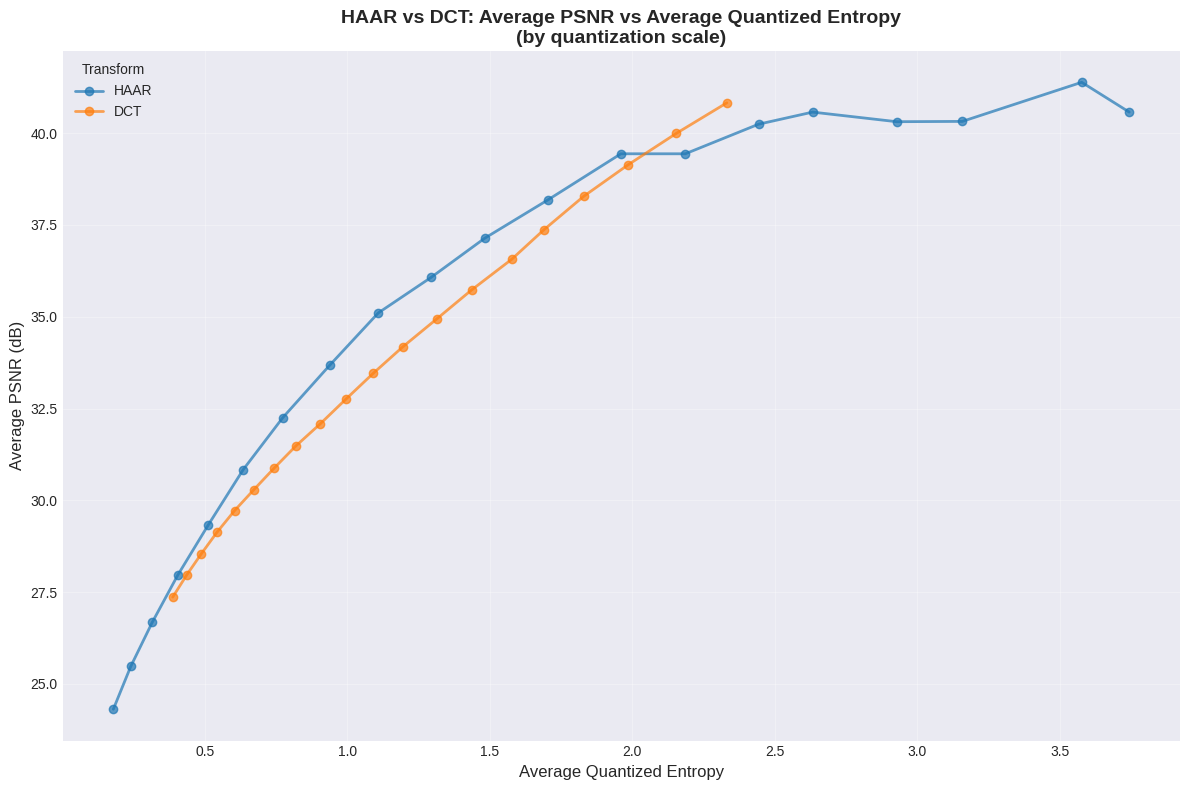

In [57]:
# Filter data for HAAR and DCT transforms only
haar_dct_data = df[df['transform'].isin(['HAAR', 'DCT'])].copy()

print(f"Number of HAAR and DCT data points: {len(haar_dct_data)}")
print(f"\nTransforms: {haar_dct_data['transform'].unique()}")

# Group by transform and quantization_scale, then compute averages
haar_dct_grouped = haar_dct_data.groupby(['transform', 'quantization_scale']).agg({
    'quantized_entropy': 'mean',
    'psnr': 'mean'
}).reset_index()

# Sort by quantization_scale for each transform to create smooth lines
haar_dct_grouped = haar_dct_grouped.sort_values(['transform', 'quantization_scale'])

print("\nGrouped data preview:")
print(haar_dct_grouped.head(10))
print(f"\nNumber of unique quantization scales: {haar_dct_grouped['quantization_scale'].nunique()}")

# Create line plot: one line per transform
plt.figure(figsize=(12, 8))

transforms = ['HAAR', 'DCT']  # Ensure consistent order
colors = {'HAAR': plt.cm.tab10(0), 'DCT': plt.cm.tab10(1)}

for transform in transforms:
    transform_data = haar_dct_grouped[haar_dct_grouped['transform'] == transform]
    plt.plot(transform_data['quantized_entropy'], transform_data['psnr'], 
            marker='o', markersize=6, linewidth=2, alpha=0.7,
            label=transform, color=colors[transform])

plt.xlabel('Average Quantized Entropy', fontsize=12)
plt.ylabel('Average PSNR (dB)', fontsize=12)
plt.title('HAAR vs DCT: Average PSNR vs Average Quantized Entropy\n(by quantization scale)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Transform', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Best Performers Analysis


In [15]:
# Find best performers in different categories
print("="*60)
print("BEST PERFORMERS")
print("="*60)

print("\n1. Highest PSNR:")
best_psnr = df.loc[df['psnr'].idxmax()]
print(best_psnr[['transform', 'dataset', 'image_path', 'psnr', 'mse', 'compression_ratio', 'total_time_ms']])

print("\n2. Highest Compression Ratio:")
best_cr = df.loc[df['compression_ratio'].idxmax()]
print(best_cr[['transform', 'dataset', 'image_path', 'psnr', 'mse', 'compression_ratio', 'total_time_ms']])

print("\n3. Lowest MSE:")
best_mse = df.loc[df['mse'].idxmin()]
print(best_mse[['transform', 'dataset', 'image_path', 'psnr', 'mse', 'compression_ratio', 'total_time_ms']])

print("\n4. Fastest Processing (lowest total time):")
best_time = df.loc[df['total_time_ms'].idxmin()]
print(best_time[['transform', 'dataset', 'image_path', 'psnr', 'mse', 'compression_ratio', 'total_time_ms']])


BEST PERFORMERS

1. Highest PSNR:
transform                                             DFT
dataset                              SquaredTextureImages
image_path           Datasets/SquaredTextureImages/24.png
psnr                                              66.5759
mse                                              0.014305
compression_ratio                                 3.04267
total_time_ms                                    2237.613
Name: 6341, dtype: object

2. Highest Compression Ratio:
transform                                             DCT
dataset                              SquaredTextureImages
image_path           Datasets/SquaredTextureImages/24.png
psnr                                              34.2702
mse                                               24.3253
compression_ratio                                  29.084
total_time_ms                                     4981.03
Name: 6339, dtype: object

3. Lowest MSE:
transform                                             D

## Pareto Frontier Analysis

Finding configurations that optimize multiple objectives simultaneously.


In [16]:
# Normalize metrics for Pareto analysis
# Higher PSNR, higher compression ratio, lower time are better
df_normalized = df.copy()
df_normalized['psnr_norm'] = (df['psnr'] - df['psnr'].min()) / (df['psnr'].max() - df['psnr'].min())
df_normalized['cr_norm'] = (df['compression_ratio'] - df['compression_ratio'].min()) / (df['compression_ratio'].max() - df['compression_ratio'].min())
df_normalized['time_norm'] = 1 - (df['total_time_ms'] - df['total_time_ms'].min()) / (df['total_time_ms'].max() - df['total_time_ms'].min())

# Composite score (weighted combination)
weights = {'psnr': 0.4, 'cr': 0.4, 'time': 0.2}
df_normalized['composite_score'] = (
    weights['psnr'] * df_normalized['psnr_norm'] +
    weights['cr'] * df_normalized['cr_norm'] +
    weights['time'] * df_normalized['time_norm']
)

# Top 10 configurations by composite score
print("Top 10 Configurations by Composite Score:")
print("(PSNR weight: 0.4, Compression Ratio weight: 0.4, Speed weight: 0.2)")
print("="*80)
top_configs = df_normalized.nlargest(10, 'composite_score')[
    ['transform', 'dataset', 'image_path', 'psnr', 'compression_ratio', 
     'total_time_ms', 'composite_score']
].round(4)
print(top_configs.to_string(index=False))


Top 10 Configurations by Composite Score:
(PSNR weight: 0.4, Compression Ratio weight: 0.4, Speed weight: 0.2)
transform              dataset                           image_path    psnr  compression_ratio  total_time_ms  composite_score
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 34.2702            29.0840        4981.03           0.7527
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 34.7312            28.4198        4871.83           0.7470
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 34.6395            27.5748        5037.39           0.7342
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 35.4169            26.8004        5064.74           0.7291
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 36.1836            26.0857        4905.22           0.7251
      DCT SquaredTextureImages Datasets/SquaredTextureImages/24.png 36.6274            25.2159        5032.35           0.7160


## Summary Statistics by Transform


In [17]:
# Create a comprehensive summary table
summary = df.groupby('transform').agg({
    'psnr': ['mean', 'std', 'min', 'max'],
    'mse': ['mean', 'std', 'min', 'max'],
    'compression_ratio': ['mean', 'std', 'min', 'max'],
    'total_time_ms': ['mean', 'std', 'min', 'max'],
    'quantized_entropy': ['mean', 'std']
}).round(4)

print("Comprehensive Summary by Transform:")
print("="*80)
summary


Comprehensive Summary by Transform:


psnr                                 mse                    \
              mean     std      min      max      mean       std     min   
transform                                                                  
DCT        33.5338  4.9189  19.4049  49.0511   53.7888   74.3826  0.8090   
DFT        38.0560  9.6226  16.9579  66.5759   65.5956  133.6170  0.0143   
HAAR       34.9654  5.9669  18.9060  51.4555   56.1882   97.3101  0.4651   
SP         28.7315  7.5107  12.3782  50.7442  283.8807  480.1171  0.5479   

                    compression_ratio                          total_time_ms  \
                max              mean     std     min      max          mean   
transform                                                                      
DCT         745.749            7.9352  4.7321  1.4819  29.0840     8972.1193   
DFT        1310.060            2.4523  2.3988  0.4161  11.6271     4638.0553   
HAAR        836.524            4.2105  2.0460  0.9415   7.9509     5243.5633   
SP         3760.670            4.8130  1.9552  1.0898   7.8902     4922.0944   

                                         quantized_entropy          
                  std      min       max              mean     std  
transform                                                           
DCT        12010.8311  73.5422  111165.6            1.1600  0.7110  
DFT         6221.0945  31.5839   60611.8            1.8361  1.4080  
HAAR        7033.0272  37.0990   66491.7            1.6111  1.2852  
SP          6497.2204  37.7483   57048.2            1.0209  0.9907